# Лабораторная работа 3

## Методы решения нелинейных уравнений и СНАУ

### Нелинейное уравнения

е) $x^{2} - 20\sin x = 0$

з) $2\operatorname{lg} x - \dfrac{x}{2} + 1 = 0$


### Системы нелинейных уравнений

**12.4 в)**

$$
\begin{cases}
\cos(x - 1) + y = 0.5, \\
x - \cos y = 3.
\end{cases}
\qquad (1)
$$

**12.6 а)**

$$
\begin{cases}
2x^{2} - xy - 5x + 1 = 0, \\
x + 3\operatorname{lg} x - y^{2} = 0.
\end{cases}
\qquad (2)
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def setup_convergence_plot(title):
    plt.figure(figsize=[14, 7])
    plt.title(title, fontsize=30)
    plt.yscale("log")
    plt.xlabel('$N$', fontsize=20)
    plt.xticks(fontsize=20, ha="center", va="top")
    plt.ylabel(r"$\log{(\mathrm{residual})}$", fontsize=20)
    plt.yticks(fontsize=20, rotation=30, ha="right", va="top")
    plt.grid(which="both")


def plot_convergence(iterations, residuals, label):
    plt.scatter(iterations, residuals, label=label)
    plt.plot(iterations, residuals)


def finalize_plot():
    plt.legend(loc="best")
    plt.tight_layout()

## Уравнение (е): $x^2 - 20\sin x = 0$

Перепишем:
$$
x^2 = 20\sin x.
$$

Из оценки $|\sin x| \le 1$ получаем $|x|^2 \le 20$, то есть $|x| \le \sqrt{20} \approx 4.47$.

Графический анализ и численный эксперимент показывают два действительных корня:
- $x_1 = 0$;
- $x_2 \approx 2.75$ (на отрезке $[2.5, 3]$).

Дальше для них применяем все три метода.

In [ ]:
def F_e(x):
    """Уравнение (е): f(x) = x^2 - 20*sin(x)."""
    return x**2 - 20 * np.sin(x)


class Bisection_Method_Equation:
    """
    Метод половинного деления для одного уравнения f(x)=0.
    n — число итераций.
    """
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, a_0, b_0):
        a = a_0
        b = b_0
        fa = self.f(a)
        fb = self.f(b)

        # Проверка смены знака на отрезке
        if fa * fb > 0:
            raise ValueError(f"На отрезке [{a_0}, {b_0}] нет смены знака функции")

        for _ in range(self.n):
            c = 0.5 * (a + b)
            fc = self.f(c)

            # выбираем подотрезок, где есть смена знака
            if fa * fc <= 0:
                b = c
                fb = fc
            else:
                a = c
                fa = fc

        # середина текущего отрезка — приближение корня
        return 0.5 * (a + b)


[2.5, 3] => root (after 20 iterations): x ≈ 2.752946615219116


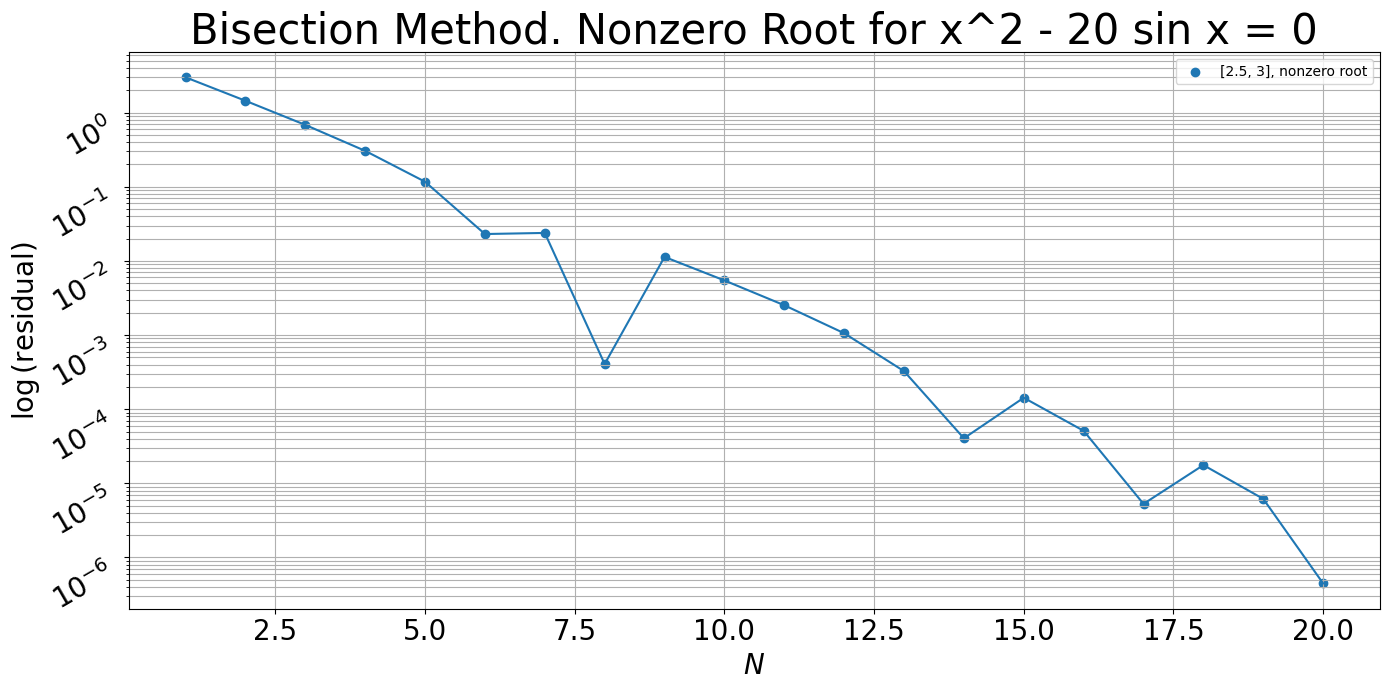

In [3]:
iterations = np.arange(1, 21)
residuals = []

setup_convergence_plot("Bisection Method. Nonzero Root for x^2 - 20 sin x = 0")

for i in iterations:
    root = Bisection_Method_Equation(F_e, i)(2.5, 3.0)
    residuals.append(np.abs(F_e(root)))

plot_convergence(iterations, residuals, "[2.5, 3], nonzero root")
finalize_plot()

print(f"[2.5, 3] => root (after {len(iterations)} iterations): x ≈ {root}")


[-1, 1] => root (after 20 iterations): x ≈ -9.5367431640625e-07


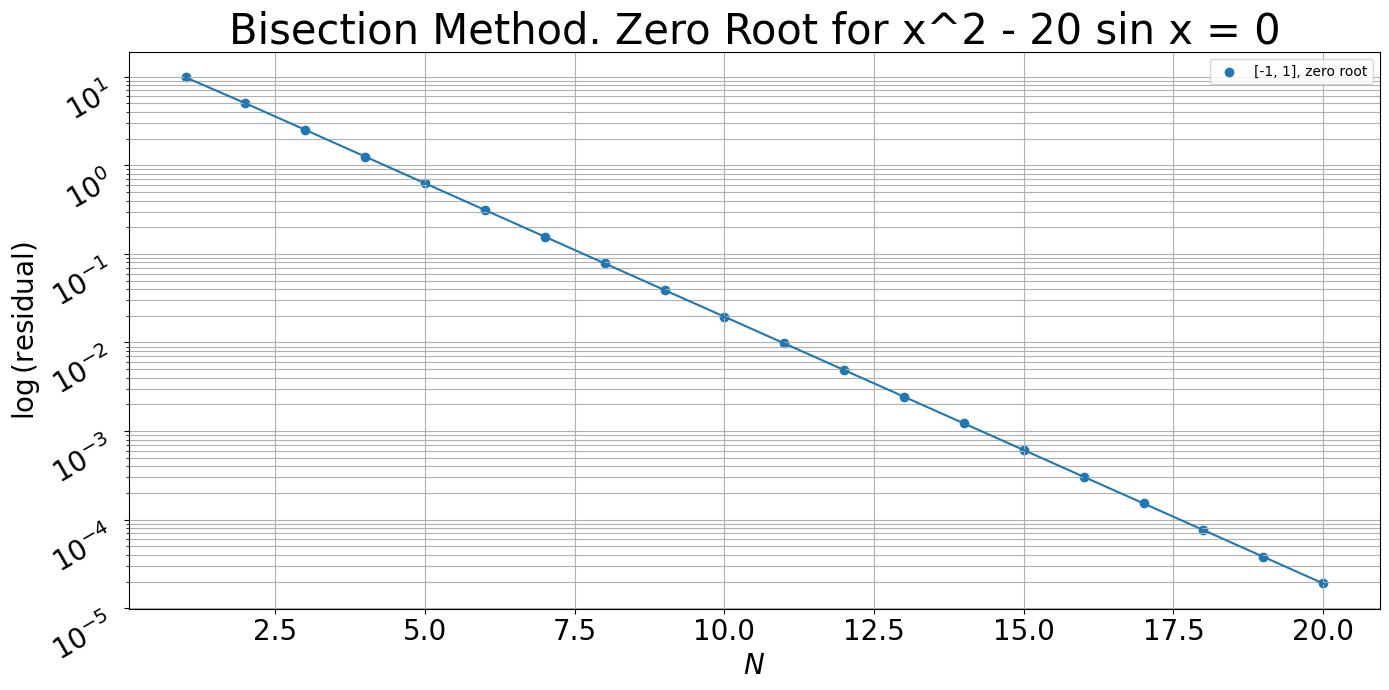

In [4]:
iterations = np.arange(1, 21)
residuals = []

setup_convergence_plot("Bisection Method. Zero Root for x^2 - 20 sin x = 0")

for i in iterations:
    root = Bisection_Method_Equation(F_e, i)(-1.0, 1.0)
    residuals.append(np.abs(F_e(root)))

plot_convergence(iterations, residuals, "[-1, 1], zero root")
finalize_plot()

print(f"[-1, 1] => root (after {len(iterations)} iterations): x ≈ {root}")


### Метод простой итерации для $x^2 - 20\sin x = 0$

Перепишем уравнение в виде $x = \varphi(x)$.

Для ненулевого корня $x_2$ на $[2.5, 3]$:

$$
x^2 - 20\sin x = 0 \Leftrightarrow x = \pi - \arcsin\frac{x^2}{20}.
$$

То есть берём
$$
\varphi(x) = \pi - \arcsin\frac{x^2}{20}.
$$

Для корня $x_1 = 0$ удобно взять
$$
x = \arcsin\frac{x^2}{20}.
$$

В окрестностях корней $|\varphi'(x)| < 1$, поэтому метод простой итерации сходится.


In [ ]:
def phi_e_nonzero(x):
    """Итерационная функция для ненулевого корня."""
    return np.pi - np.arcsin(x**2 / 20)

def phi_e_zero(x):
    """Итерационная функция для корня x = 0."""
    return np.arcsin(x**2 / 20)


class Fixed_Point_Iteration_Equation:
    """
    Метод простой итерации x_{n+1} = phi(x_n).
    n — число итераций.
    """
    def __init__(self, phi, n):
        self.phi = phi
        self.n = n

    def __call__(self, x_0):
        x = x_0
        for _ in range(self.n):
            x = self.phi(x)
        return x


x_0 = 3 => root ≈ 2.7529466338263275


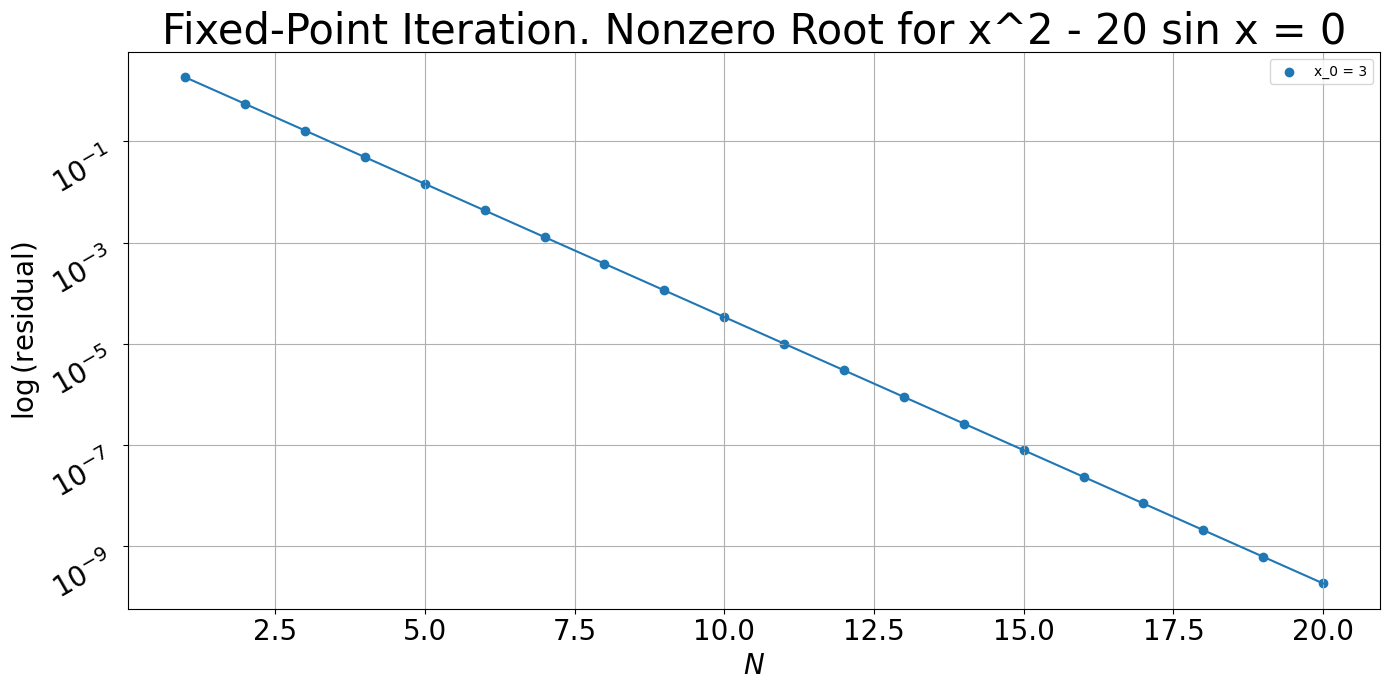

In [6]:
iterations = np.arange(1, 21)
residuals = []

setup_convergence_plot("Fixed-Point Iteration. Nonzero Root for x^2 - 20 sin x = 0")

for i in iterations:
    root = Fixed_Point_Iteration_Equation(phi_e_nonzero, i)(3.0)
    residuals.append(np.abs(F_e(root)))

plot_convergence(iterations, residuals, "x_0 = 3")
finalize_plot()

print(f"x_0 = 3 => root ≈ {root}")


x_0 = 0.5 => root ≈ 1.0846540435014123e-50


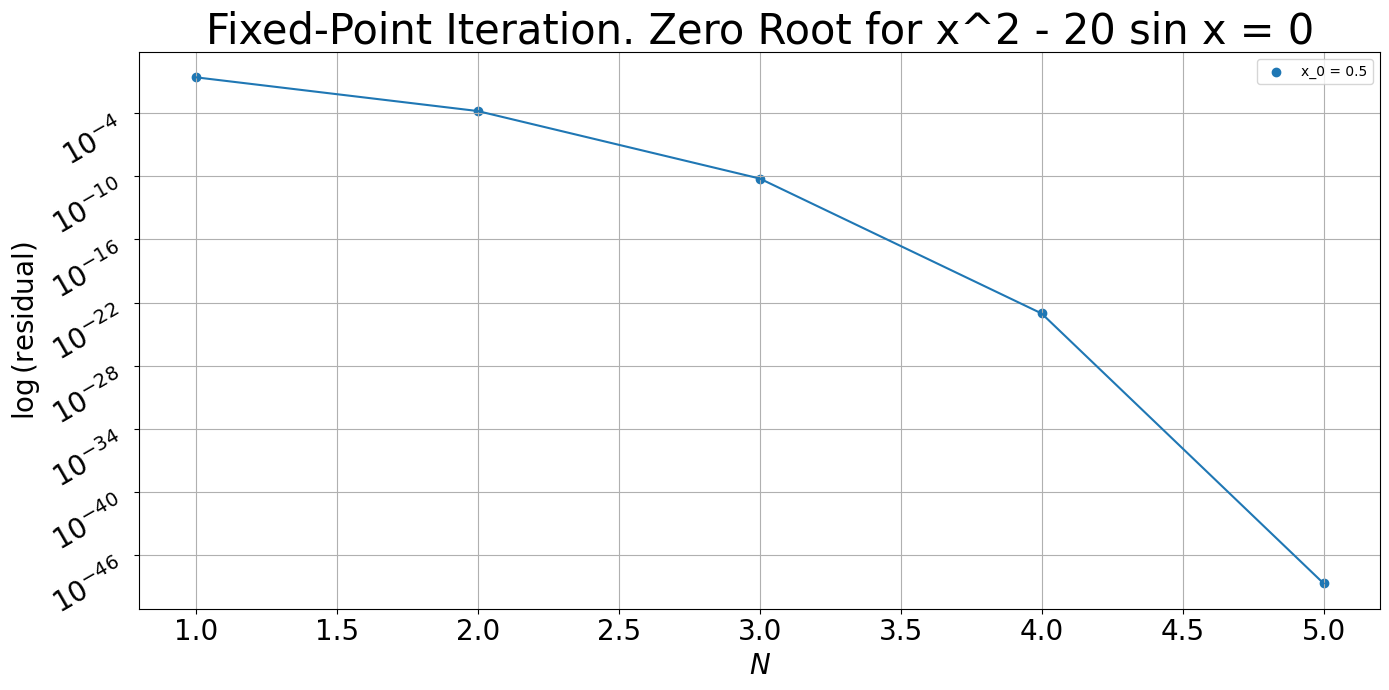

In [7]:
iterations = np.arange(1, 6)  # до корня 0 метод сходится очень быстро
residuals = []

setup_convergence_plot("Fixed-Point Iteration. Zero Root for x^2 - 20 sin x = 0")

for i in iterations:
    root = Fixed_Point_Iteration_Equation(phi_e_zero, i)(0.5)
    residuals.append(np.abs(F_e(root)))

plot_convergence(iterations, residuals, "x_0 = 0.5")
finalize_plot()

print(f"x_0 = 0.5 => root ≈ {root}")


### Метод Ньютона для $x^2 - 20\sin x = 0$

Итерационная формула Ньютона:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

В коде для удобства используем численную производную:
$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}.
$$


In [ ]:
def num_deriv(f, x, h=1e-3):
    """Численная производная по формуле центральной разности."""
    return (f(x + h) - f(x - h)) / (2 * h)


class Newton_Equation:
    """
    Метод Ньютона для одного уравнения f(x)=0.
    n — число итераций.
    """
    def __init__(self, f, n):
        self.f = f
        self.n = n

    def __call__(self, x_0):
        x = x_0
        for _ in range(self.n):
            x = x - self.f(x) / num_deriv(self.f, x, 1e-3)
        return x


x_0 = 3   => root ≈ 2.7529466338187047
x_0 = 2.8 => root ≈ 2.7529466338187047


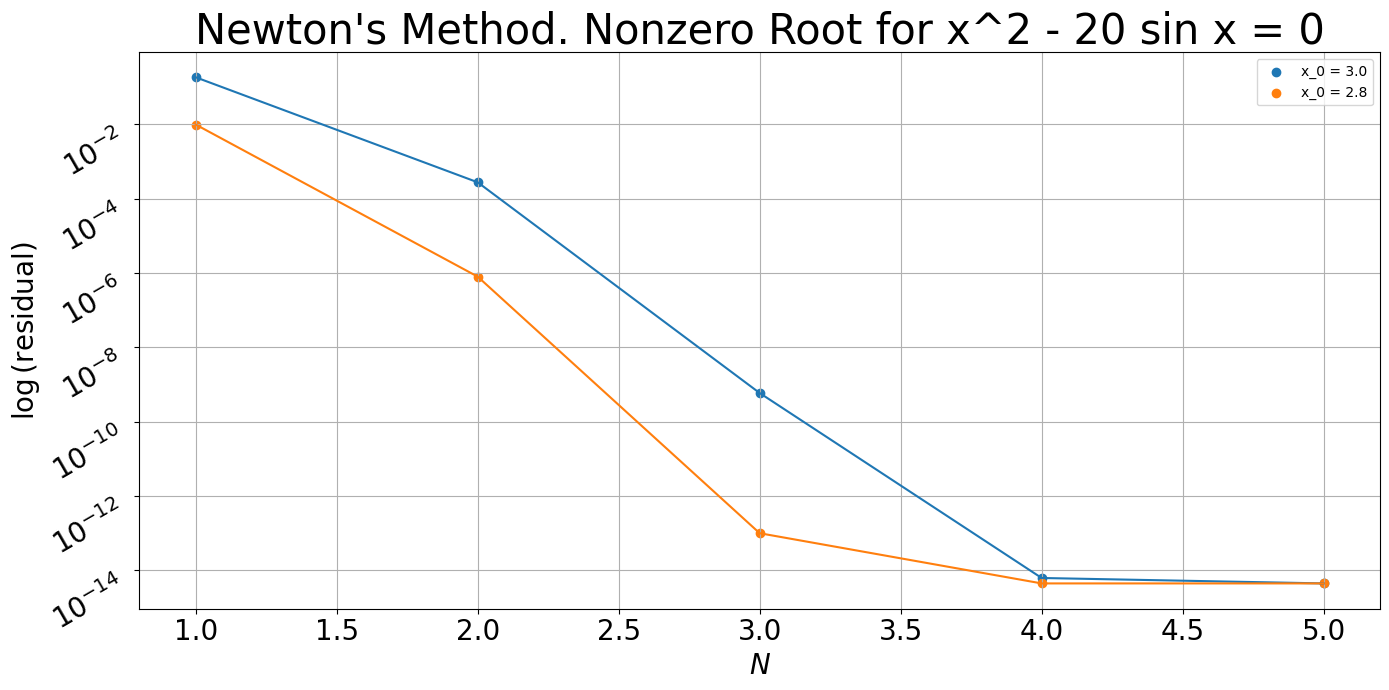

In [9]:
iterations = np.arange(1, 6)

setup_convergence_plot("Newton's Method. Nonzero Root for x^2 - 20 sin x = 0")

# два разных начальных приближения, оба сходятся к ~2.75
for x0 in [3.0, 2.8]:
    residuals = [np.abs(F_e(Newton_Equation(F_e, i)(x0))) for i in iterations]
    plot_convergence(iterations, residuals, f"x_0 = {x0}")

finalize_plot()

print(f"x_0 = 3   => root ≈ {Newton_Equation(F_e, 5)(3.0)}")
print(f"x_0 = 2.8 => root ≈ {Newton_Equation(F_e, 5)(2.8)}")


x_0 = 0.5 => root ≈ -1.8581101203682818e-23
x_0 = 0.1 => root ≈ 1.6221542085612976e-28


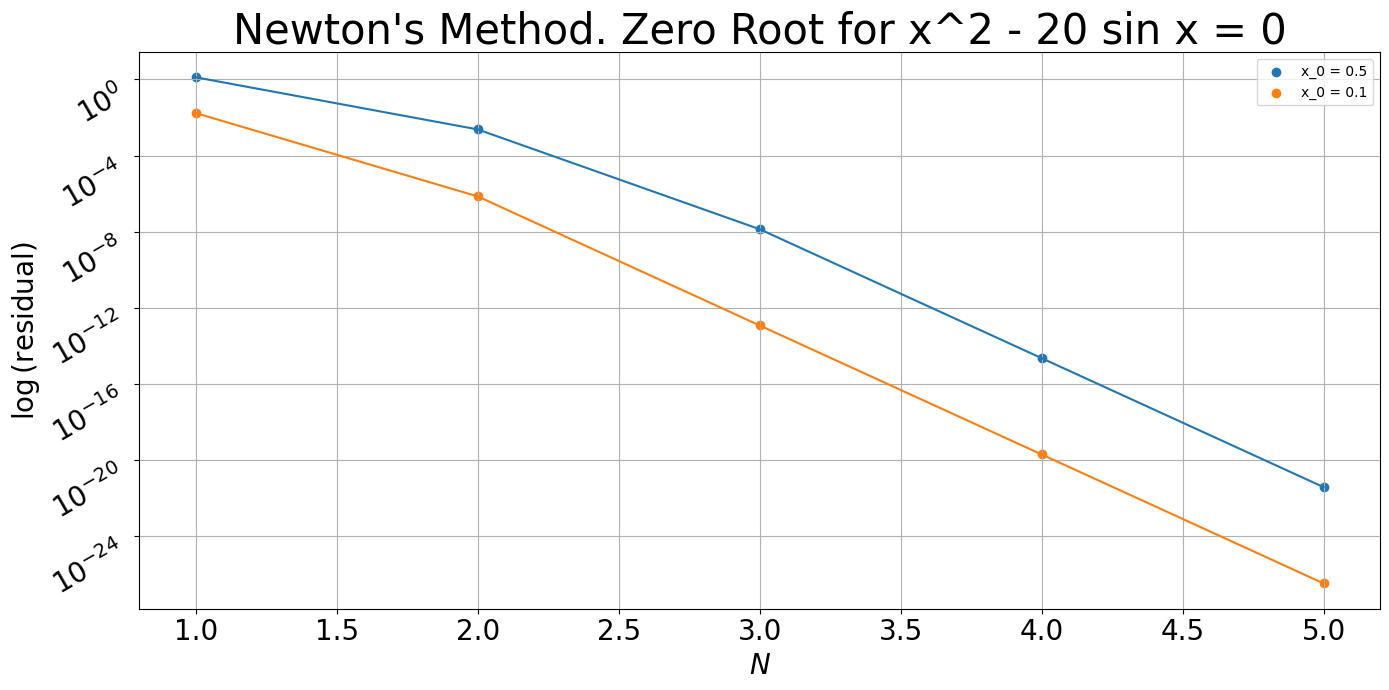

In [10]:
iterations = np.arange(1, 6)

setup_convergence_plot("Newton's Method. Zero Root for x^2 - 20 sin x = 0")

for x0 in [0.5, 0.1]:
    residuals = [np.abs(F_e(Newton_Equation(F_e, i)(x0))) for i in iterations]
    plot_convergence(iterations, residuals, f"x_0 = {x0}")

finalize_plot()

print(f"x_0 = 0.5 => root ≈ {Newton_Equation(F_e, 5)(0.5)}")
print(f"x_0 = 0.1 => root ≈ {Newton_Equation(F_e, 5)(0.1)}")


## Уравнение (з): $2\lg x - \dfrac{x}{2} + 1 = 0$

Область определения: $x > 0$.

Обозначим
$$
f(x) = 2\lg x - \frac{x}{2} + 1.
$$

Численный поиск и просмотр графика показывают два корня:
- $x_1 \approx 0.40$ на отрезке $[0.3, 0.4]$;
- $x_2 \approx 4.68$ на отрезке $[4.6, 4.7]$.


In [ ]:
def F_z(x):
    """Уравнение (з): f(x) = 2*lg(x) - x/2 + 1, логарифм по основанию 10."""
    return 2 * np.log10(x) - x / 2 + 1


[0.3, 0.4] => root (after 20 iterations): x ≈ 0.39754490852355956


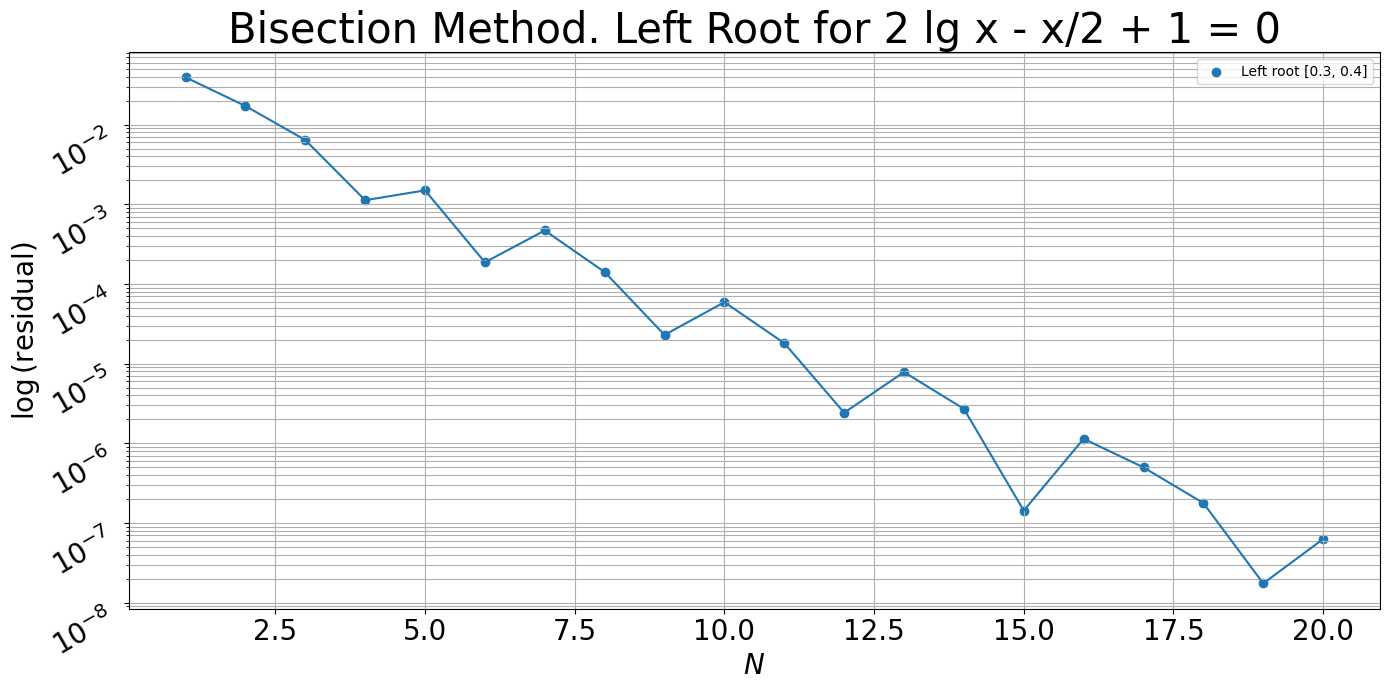

In [12]:
iterations = np.arange(1, 21)
residuals = []

setup_convergence_plot("Bisection Method. Left Root for 2 lg x - x/2 + 1 = 0")

for i in iterations:
    root = Bisection_Method_Equation(F_z, i)(0.3, 0.4)
    residuals.append(np.abs(F_z(root)))

plot_convergence(iterations, residuals, "Left root [0.3, 0.4]")
finalize_plot()

print(f"[0.3, 0.4] => root (after {len(iterations)} iterations): x ≈ {root}")


[4.6, 4.7] => root (after 20 iterations): x ≈ 4.681563806533813


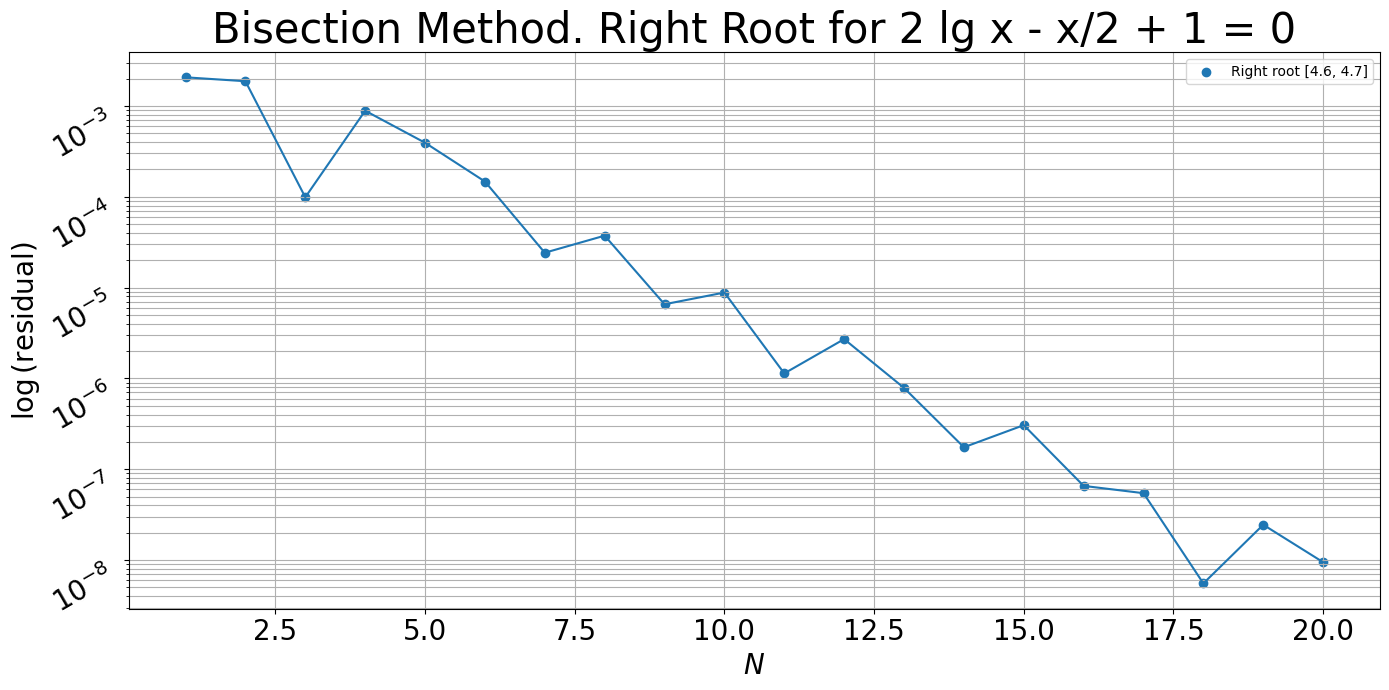

In [13]:
iterations = np.arange(1, 21)
residuals = []

setup_convergence_plot("Bisection Method. Right Root for 2 lg x - x/2 + 1 = 0")

for i in iterations:
    root = Bisection_Method_Equation(F_z, i)(4.6, 4.7)
    residuals.append(np.abs(F_z(root)))

plot_convergence(iterations, residuals, "Right root [4.6, 4.7]")
finalize_plot()

print(f"[4.6, 4.7] => root (after {len(iterations)} iterations): x ≈ {root}")


### Метод простой итерации для $2\lg x - \dfrac{x}{2} + 1 = 0$

$$
2\lg x - \frac{x}{2} + 1 = 0.
$$

1. Вариант для большого корня:
$$
\frac{x}{2} = 2\lg x + 1 \Rightarrow x = 4\lg x + 2.
$$
Берём
$$
\varphi_{\text{big}}(x) = 4 \lg x + 2.
$$

2. Вариант для малого корня:
$$
2\lg x = \frac{x}{2} - 1 \Rightarrow \lg x = \frac{x}{4} - \frac{1}{2}
\Rightarrow x = 10^{\frac{x}{4} - \frac{1}{2}}.
$$
Берём
$$
\varphi_{\text{small}}(x) = 10^{\frac{x}{4} - \frac{1}{2}}.
$$

В окрестностях корней $|\varphi'(x)| < 1$, поэтому МПИ сходится.


Small root, x_0 = 0.2 => x ≈ 0.3975449458445001
Big root, x_0 = 1 => x ≈ 4.681563740788764


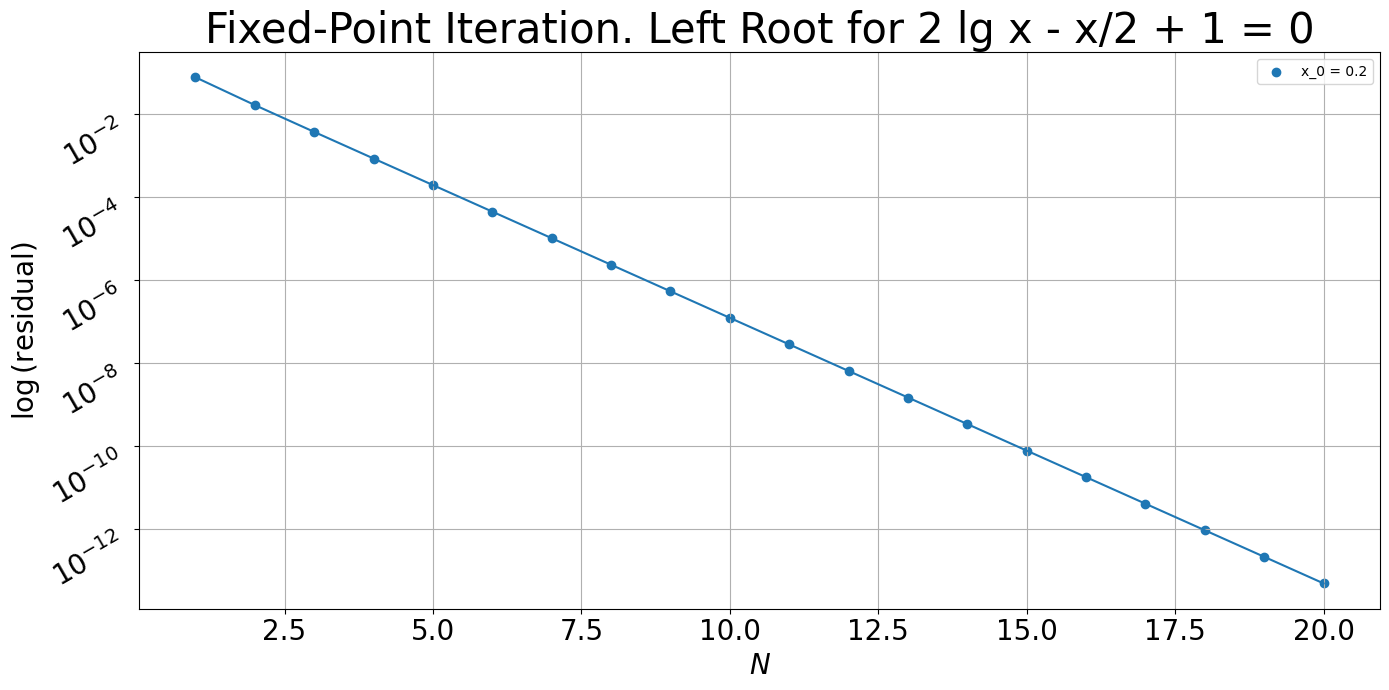

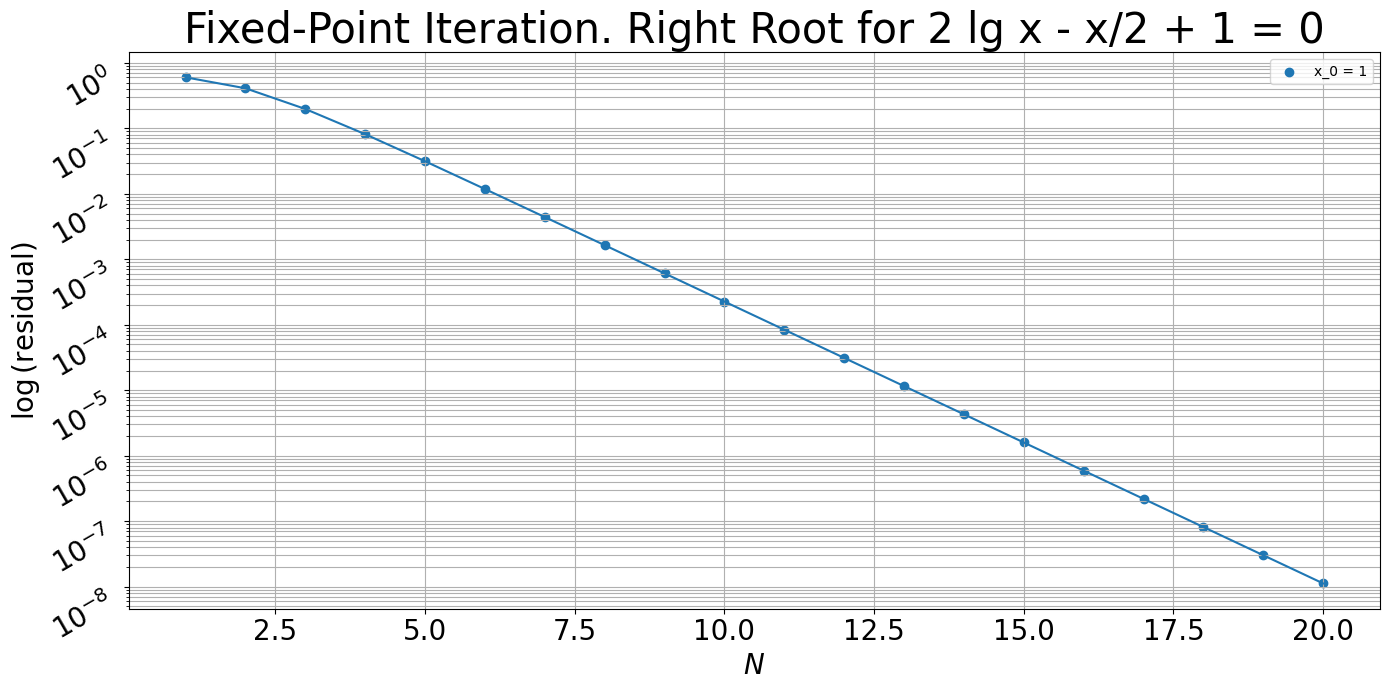

In [14]:
def phi_z_big(x):
    """Итерационная функция для большого корня уравнения (з)."""
    return 4 * np.log10(x) + 2

def phi_z_small(x):
    """Итерационная функция для малого корня уравнения (з)."""
    return 10**(x / 4 - 0.5)


iterations = np.arange(1, 21)

# Малый корень
setup_convergence_plot("Fixed-Point Iteration. Left Root for 2 lg x - x/2 + 1 = 0")
residuals = []
for i in iterations:
    root = Fixed_Point_Iteration_Equation(phi_z_small, i)(0.2)
    residuals.append(np.abs(F_z(root)))
plot_convergence(iterations, residuals, "x_0 = 0.2")
finalize_plot()
print(f"Small root, x_0 = 0.2 => x ≈ {root}")

# Большой корень
setup_convergence_plot("Fixed-Point Iteration. Right Root for 2 lg x - x/2 + 1 = 0")
residuals = []
for i in iterations:
    root = Fixed_Point_Iteration_Equation(phi_z_big, i)(1.0)
    residuals.append(np.abs(F_z(root)))
plot_convergence(iterations, residuals, "x_0 = 1")
finalize_plot()
print(f"Big root, x_0 = 1 => x ≈ {root}")


Left root, x_0 = 0.2 => x ≈ 0.3975449458444875
Left root, x_0 = 0.5 => x ≈ 0.39754494584452865
Right root, x_0 = 2   => x ≈ 4.681563776453652
Right root, x_0 = 5   => x ≈ 4.681563776429494


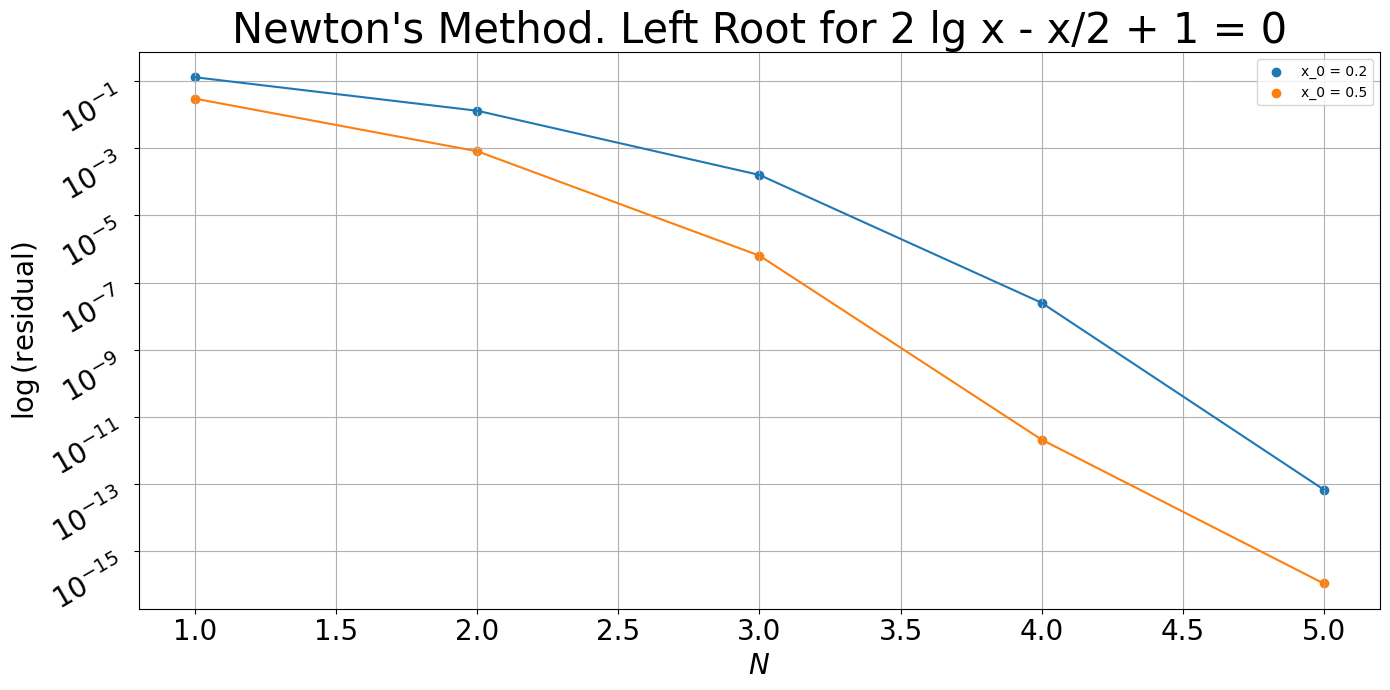

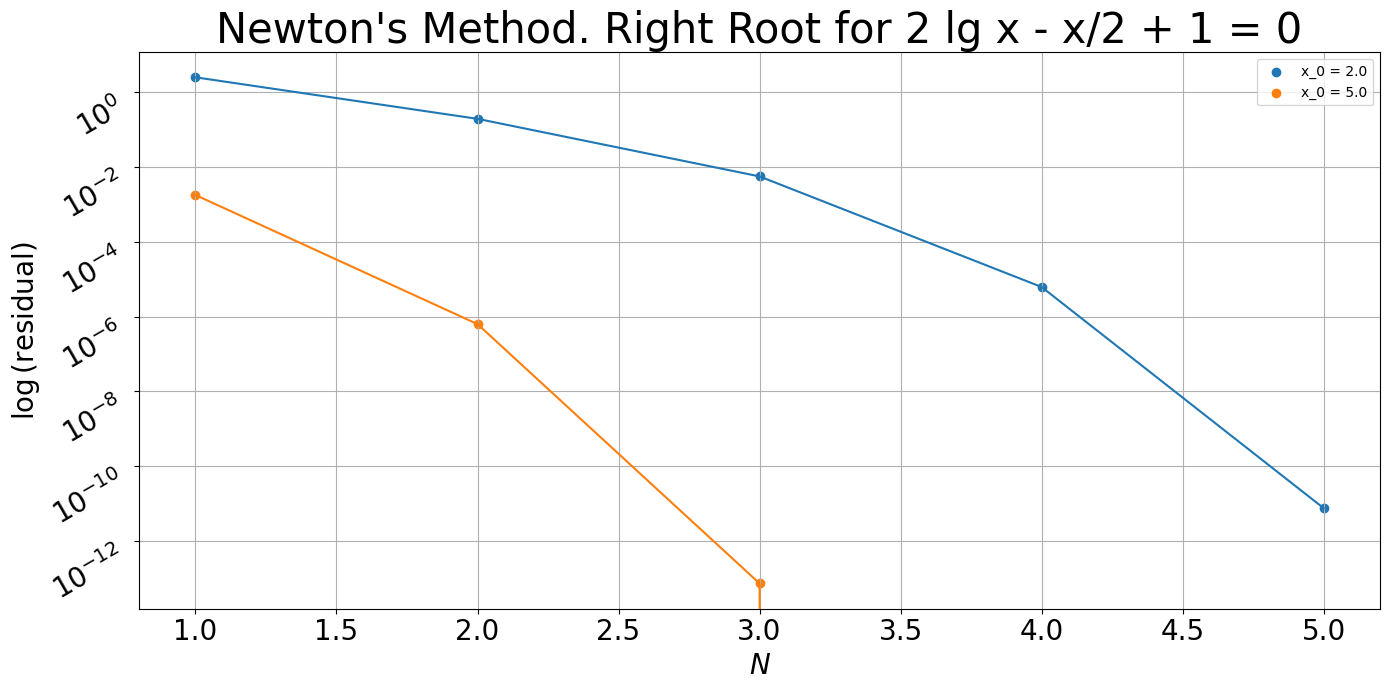

In [15]:
iterations = np.arange(1, 6)

# Левый корень
setup_convergence_plot("Newton's Method. Left Root for 2 lg x - x/2 + 1 = 0")
for x0 in [0.2, 0.5]:
    residuals = [np.abs(F_z(Newton_Equation(F_z, i)(x0))) for i in iterations]
    plot_convergence(iterations, residuals, f"x_0 = {x0}")
finalize_plot()
print(f"Left root, x_0 = 0.2 => x ≈ {Newton_Equation(F_z, 5)(0.2)}")
print(f"Left root, x_0 = 0.5 => x ≈ {Newton_Equation(F_z, 5)(0.5)}")

# Правый корень
setup_convergence_plot("Newton's Method. Right Root for 2 lg x - x/2 + 1 = 0")
for x0 in [2.0, 5.0]:
    residuals = [np.abs(F_z(Newton_Equation(F_z, i)(x0))) for i in iterations]
    plot_convergence(iterations, residuals, f"x_0 = {x0}")
finalize_plot()
print(f"Right root, x_0 = 2   => x ≈ {Newton_Equation(F_z, 5)(2.0)}")
print(f"Right root, x_0 = 5   => x ≈ {Newton_Equation(F_z, 5)(5.0)}")


## Система 12.4 (в)

$$
\begin{cases}
\cos(x - 1) + y = 0.5, \\
x - \cos y = 3.
\end{cases}
$$

Перепишем её как
$$
\begin{cases}
y = 0.5 - \cos(x - 1), \\
x = 3 + \cos y.
\end{cases}
$$

Численно получаем единственное решение:
$$
x \approx 3.36,\quad y \approx 1.21.
$$

Дальше применяем МПИ и метод Ньютона.


In [16]:
def f1_124v(x, y):
    return np.cos(x - 1) + y - 0.5

def f2_124v(x, y):
    return x - np.cos(y) - 3


def phi_x_124v(y):
    """x_{n+1} = 3 + cos(y_n)"""
    return 3 + np.cos(y)

def phi_y_124v(x):
    """y_{n+1} = 0.5 - cos(x_n - 1)"""
    return 0.5 - np.cos(x - 1)


class Fixed_Point_Iteration_System:
    """
    МПИ для системы:
        x_{n+1} = phi_x(y_n)
        y_{n+1} = phi_y(x_{n+1})  (используем новое x)
    """
    def __init__(self, phi_x, phi_y, n):
        self.phi_x = phi_x
        self.phi_y = phi_y
        self.n = n

    def __call__(self, x_0, y_0):
        x = x_0
        y = y_0
        for _ in range(self.n):
            x = self.phi_x(y)
            y = self.phi_y(x)
        return x, y


Fixed-Point Iteration, start (3,0): x ≈ 3.355909218890173, y ≈ 1.2069050351449655


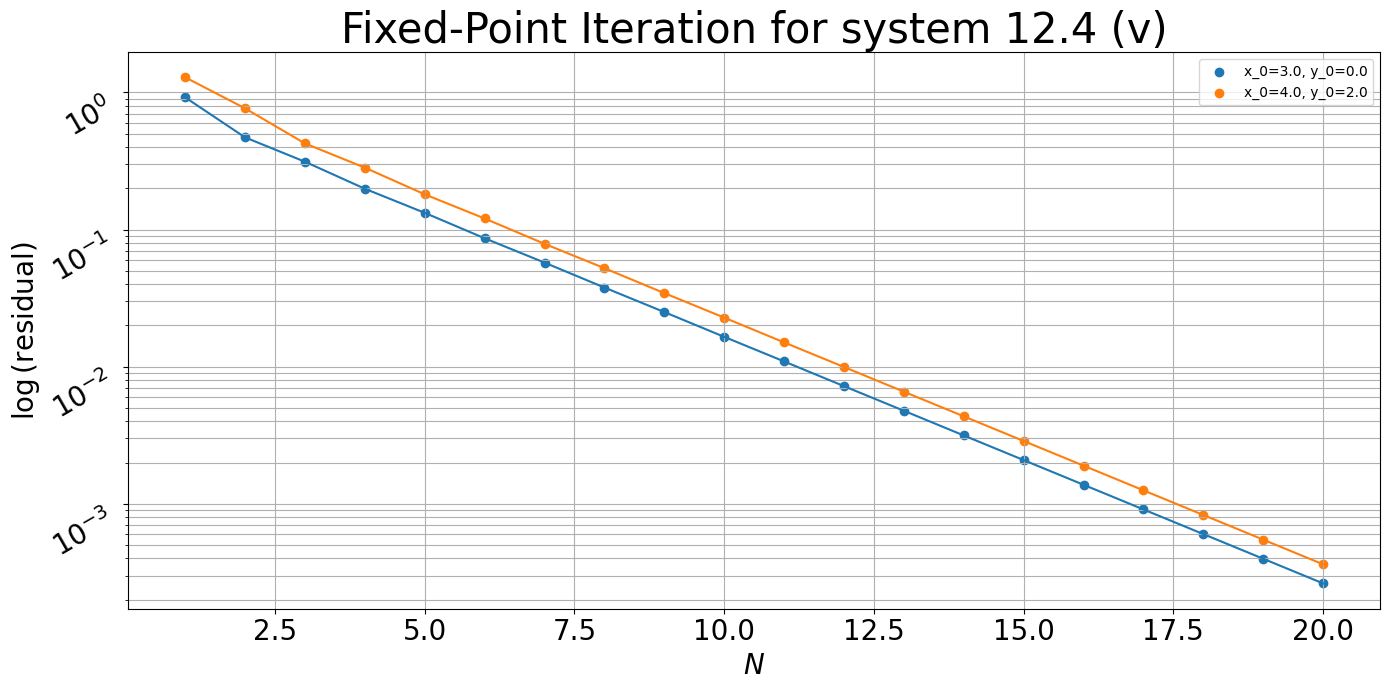

In [17]:
iterations = np.arange(1, 21)

setup_convergence_plot("Fixed-Point Iteration for system 12.4 (v)")

# два разных начальных приближения
for x0, y0 in [(3.0, 0.0), (4.0, 2.0)]:
    residuals = []
    for n in iterations:
        x, y = Fixed_Point_Iteration_System(phi_x_124v, phi_y_124v, n)(x0, y0)
        residuals.append(np.abs(f1_124v(x, y)) + np.abs(f2_124v(x, y)))
    plot_convergence(iterations, residuals, f"x_0={x0}, y_0={y0}")

finalize_plot()

root_x, root_y = Fixed_Point_Iteration_System(phi_x_124v, phi_y_124v, 30)(3.0, 0.0)
print(f"Fixed-Point Iteration, start (3,0): x ≈ {root_x}, y ≈ {root_y}")


In [18]:
def num_dx(f, x, y, h=1e-6):
    return (f(x + h, y) - f(x - h, y)) / (2 * h)

def num_dy(f, x, y, h=1e-6):
    return (f(x, y + h) - f(x, y - h)) / (2 * h)


class Newton_System:
    """
    Модифицированный метод Ньютона для системы двух уравнений.
    Якобиан J считаем один раз при начальном приближении.
    """
    def __init__(self, f1, f2, n):
        self.f1 = f1
        self.f2 = f2
        self.n = n

    def __call__(self, x0, y0):
        x = x0
        y = y0

        # Якобиан в начальной точке
        J = np.zeros((2, 2))
        J[0, 0] = num_dx(self.f1, x, y)
        J[0, 1] = num_dy(self.f1, x, y)
        J[1, 0] = num_dx(self.f2, x, y)
        J[1, 1] = num_dy(self.f2, x, y)
        J_inv = np.linalg.inv(J)

        for _ in range(self.n):
            F_vec = np.array([self.f1(x, y), self.f2(x, y)])
            dx, dy = J_inv @ F_vec
            x -= dx
            y -= dy

        return x, y


Newton, start (3.2, 1.1): x ≈ 3.3559117388279, y ≈ 1.2069068175160185


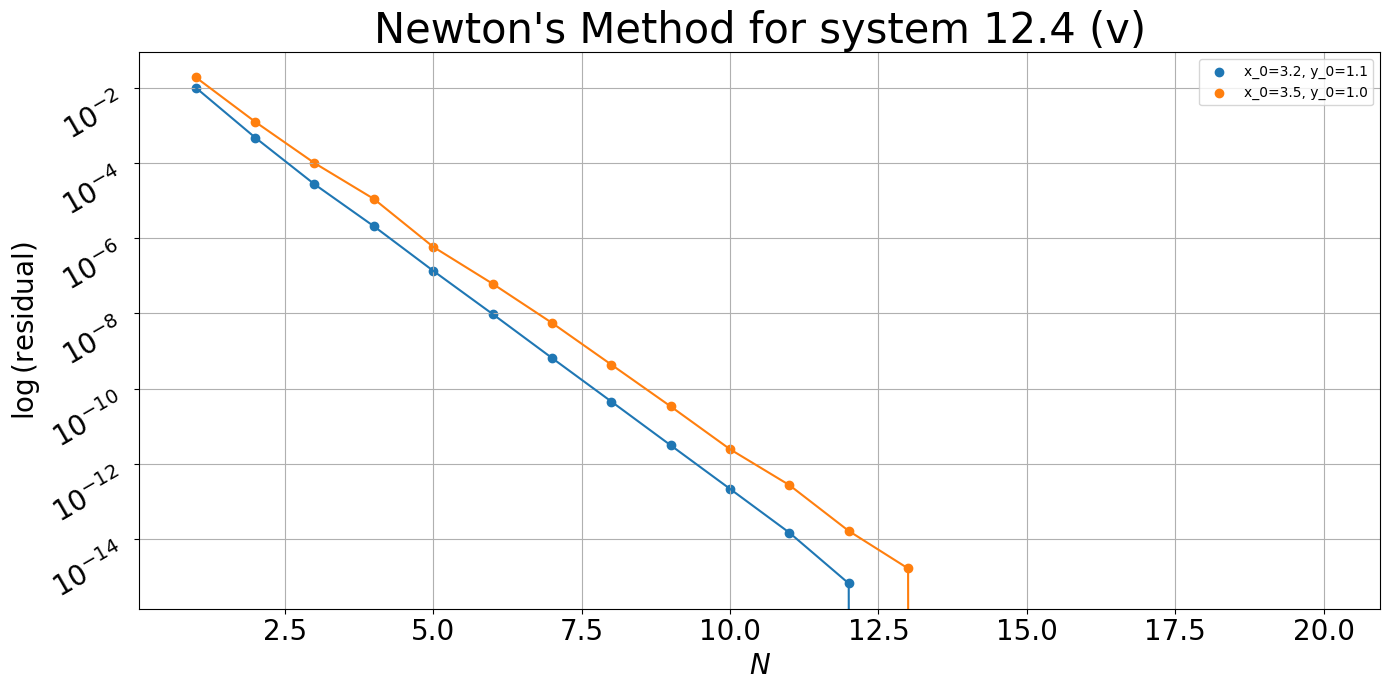

In [19]:
iterations = np.arange(1, 21)

setup_convergence_plot("Newton's Method for system 12.4 (v)")

# Берём начальное приближение, достаточно близкое к корню
for x0, y0 in [(3.2, 1.1), (3.5, 1.0)]:
    residuals = []
    for n in iterations:
        x, y = Newton_System(f1_124v, f2_124v, n)(x0, y0)
        residuals.append(np.abs(f1_124v(x, y)) + np.abs(f2_124v(x, y)))
    plot_convergence(iterations, residuals, f"x_0={x0}, y_0={y0}")

finalize_plot()

root_x, root_y = Newton_System(f1_124v, f2_124v, 20)(3.2, 1.1)
print(f"Newton, start (3.2, 1.1): x ≈ {root_x}, y ≈ {root_y}")


## Система 12.6 (а)

$$
\begin{cases}
2x^{2} - xy - 5x + 1 = 0, \\
x + 3\lg x - y^{2} = 0.
\end{cases}
$$

Условие: $x > 0$ (из-за $\lg x$).

Перепишем систему для метода простой итерации.

1. Первое уравнение как квадратное относительно $x$:
$$
2x^{2} - (y + 5)x + 1 = 0 \Rightarrow
x = \frac{y + 5 \pm \sqrt{(y + 5)^2 - 8}}{4}.
$$

Берём ветвь с плюсом:
$$
\varphi_1(y) = \frac{y + 5 + \sqrt{(y + 5)^2 - 8}}{4}.
$$

2. Второе уравнение:
$$
y^2 = x + 3\lg x \Rightarrow
y = \pm\sqrt{x + 3\lg x}.
$$

Получаем две ветви для $y$:
$$
\varphi_{2,+}(x) = \sqrt{x + 3\lg x},\quad
\varphi_{2,-}(x) = -\sqrt{x + 3\lg x}.
$$

Соответственно, ожидаем два решения:
- с $y > 0$;
- с $y < 0$.


In [20]:
def f1_126a(x, y):
    return 2 * x**2 - x * y - 5 * x + 1

def f2_126a(x, y):
    return x + 3 * np.log10(x) - y**2


def phi_x_126a(y):
    """Вычисление x из первого уравнения (ветвь с плюсом)."""
    disc = (y + 5)**2 - 8
    return (y + 5 + np.sqrt(disc)) / 4

def phi_y_plus_126a(x):
    """Положительная ветвь для y."""
    return np.sqrt(x + 3 * np.log10(x))

def phi_y_minus_126a(x):
    """Отрицательная ветвь для y."""
    return -np.sqrt(x + 3 * np.log10(x))


Fixed-Point, y>0  : x ≈ 3.4874427876429537, y ≈ 2.261628630553594
Fixed-Point, y<0  : x ≈ 1.4588902301560198, y ≈ -1.3967670091842217


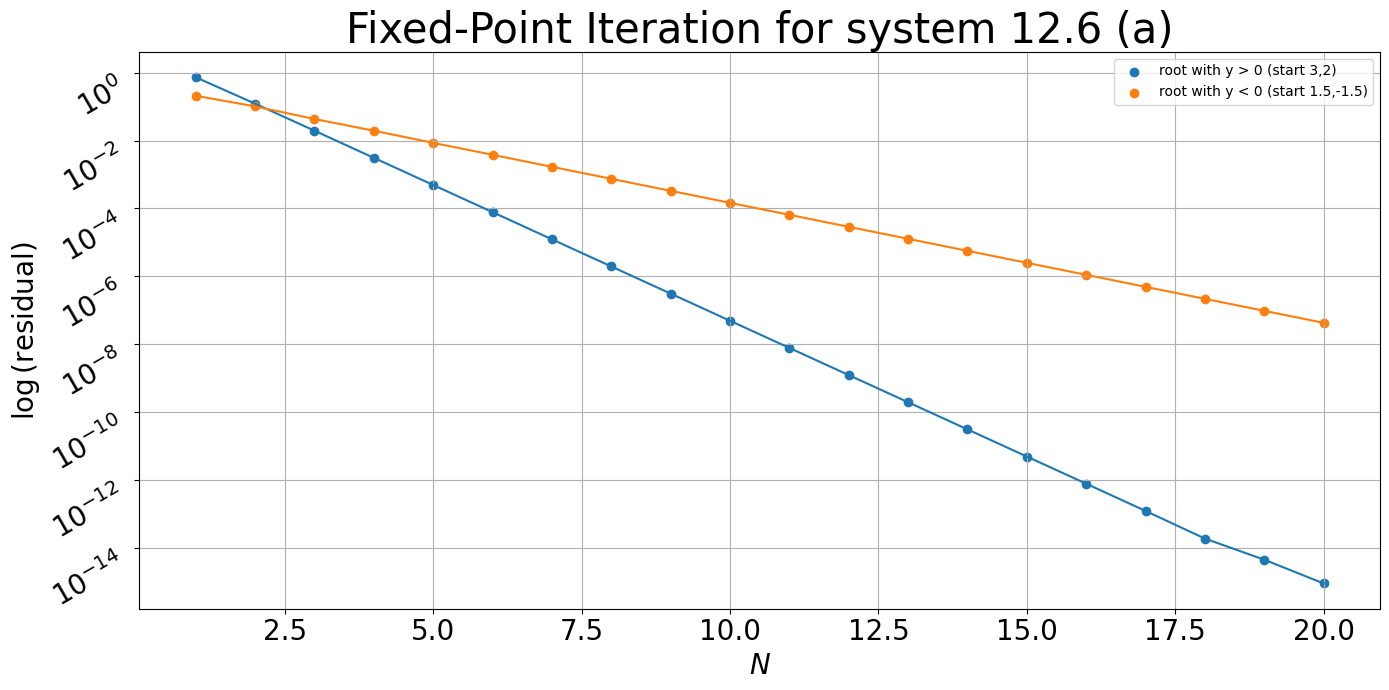

In [21]:
iterations = np.arange(1, 21)

setup_convergence_plot("Fixed-Point Iteration for system 12.6 (a)")

# корень с y > 0
residuals = []
for n in iterations:
    x, y = Fixed_Point_Iteration_System(phi_x_126a, phi_y_plus_126a, n)(3.0, 2.0)
    residuals.append(np.abs(f1_126a(x, y)) + np.abs(f2_126a(x, y)))
plot_convergence(iterations, residuals, "root with y > 0 (start 3,2)")

# корень с y < 0
residuals = []
for n in iterations:
    x, y = Fixed_Point_Iteration_System(phi_x_126a, phi_y_minus_126a, n)(1.5, -1.5)
    residuals.append(np.abs(f1_126a(x, y)) + np.abs(f2_126a(x, y)))
plot_convergence(iterations, residuals, "root with y < 0 (start 1.5,-1.5)")

finalize_plot()

root_x1, root_y1 = Fixed_Point_Iteration_System(phi_x_126a, phi_y_plus_126a, 30)(3.0, 2.0)
root_x2, root_y2 = Fixed_Point_Iteration_System(phi_x_126a, phi_y_minus_126a, 30)(1.5, -1.5)

print(f"Fixed-Point, y>0  : x ≈ {root_x1}, y ≈ {root_y1}")
print(f"Fixed-Point, y<0  : x ≈ {root_x2}, y ≈ {root_y2}")


Newton, y>0: x ≈ 3.4874427765293277, y ≈ 2.261628624247247
Newton, y<0: x ≈ 1.4588902301521778, y ≈ -1.396767009181618


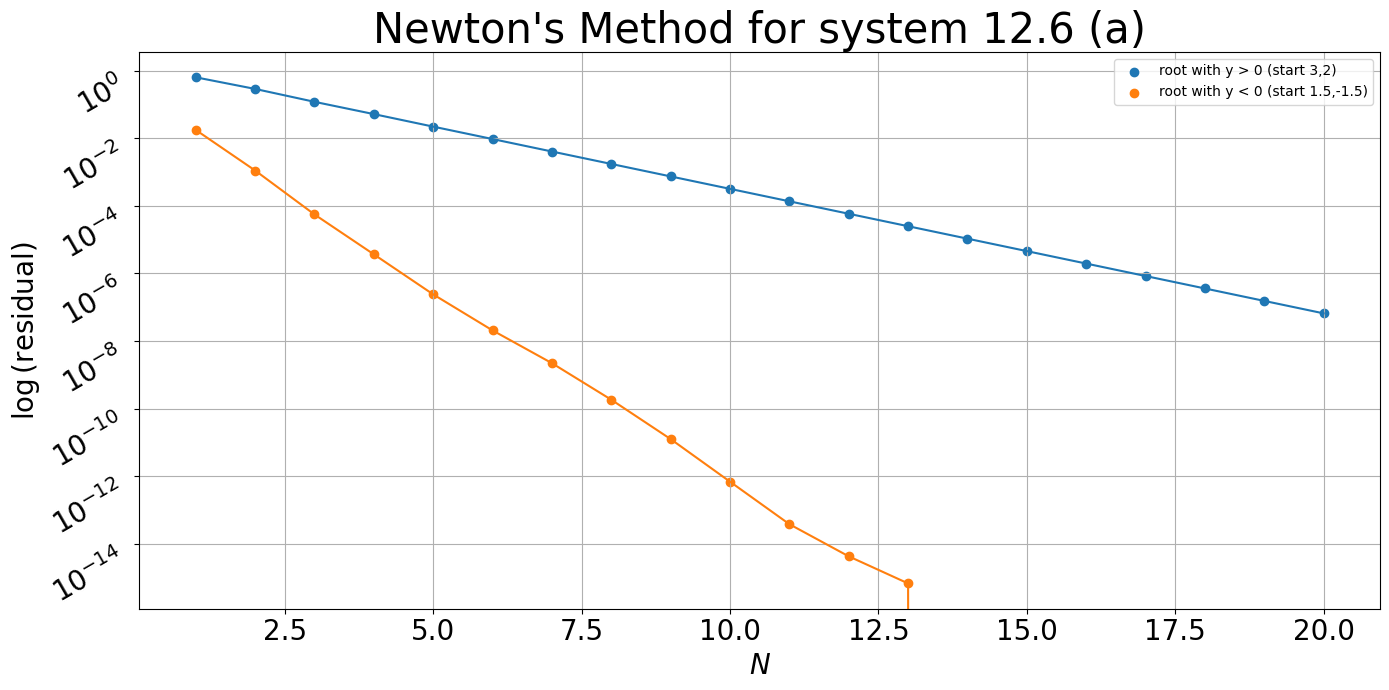

In [22]:
iterations = np.arange(1, 21)

setup_convergence_plot("Newton's Method for system 12.6 (a)")

# корень с y > 0
residuals = []
for n in iterations:
    x, y = Newton_System(f1_126a, f2_126a, n)(3.0, 2.0)
    residuals.append(np.abs(f1_126a(x, y)) + np.abs(f2_126a(x, y)))
plot_convergence(iterations, residuals, "root with y > 0 (start 3,2)")

# корень с y < 0
residuals = []
for n in iterations:
    x, y = Newton_System(f1_126a, f2_126a, n)(1.5, -1.5)
    residuals.append(np.abs(f1_126a(x, y)) + np.abs(f2_126a(x, y)))
plot_convergence(iterations, residuals, "root with y < 0 (start 1.5,-1.5)")

finalize_plot()

root_x1, root_y1 = Newton_System(f1_126a, f2_126a, 20)(3.0, 2.0)
root_x2, root_y2 = Newton_System(f1_126a, f2_126a, 20)(1.5, -1.5)

print(f"Newton, y>0: x ≈ {root_x1}, y ≈ {root_y1}")
print(f"Newton, y<0: x ≈ {root_x2}, y ≈ {root_y2}")
